In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error,r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
import warnings

In [11]:
from catboost import CatBoostRegressor
from xgboost import XGBRFRegressor

In [15]:
df = pd.read_csv(r"C:\Users\abang\OneDrive\Desktop\mlproject\notebook\data\stu_data.csv")

In [16]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [17]:
X = df.drop(columns=['math score'],axis=1)

Y = df['math score']

In [18]:
X

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75
...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,99,95
996,male,group C,high school,free/reduced,none,55,55
997,female,group C,high school,free/reduced,completed,71,65
998,female,group D,some college,standard,completed,78,77


In [19]:
Y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math score, Length: 1000, dtype: int64

In [20]:
#Check categories in each columns
print("Categories in 'gender' variable:     ", end=" ")
print(df['gender'].unique())

print("Categories in 'race/ethnicity' variable:  ", end=" ")
print(df['race/ethnicity'].unique())

print("Categories in 'parental level of education' variable:", end=" ")
print(df['parental level of education'].unique())

print("Categories in 'lunch' variable:     ", end=" ")
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:     ", end=" ")
print(df['test preparation course'].unique())

Categories in 'gender' variable:      ['female' 'male']
Categories in 'race/ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:      ['standard' 'free/reduced']
Categories in 'test preparation course' variable:      ['none' 'completed']


In [21]:
num_features = X.select_dtypes(exclude='object').columns
cat_features = X.select_dtypes(include='object').columns

In [22]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

In [23]:
numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

In [27]:
preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder",oh_transformer,cat_features),
        ("StandardScaler",numeric_transformer,num_features),
    ]
    
)

In [28]:
X = preprocessor.fit_transform(X)

In [29]:
X

array([[ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.19399858,  0.39149181],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         1.42747598,  1.31326868],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.77010859,  1.64247471],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.12547206, -0.20107904],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.60515772,  0.58901542],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.15336989,  1.18158627]])

In [30]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=42)
x_train.shape,x_test.shape

((800, 19), (200, 19))

In [33]:
# Creating An Evaluate model to give all metrics for training model
def evaluate_model(true,prediction):
    mae = mean_absolute_error(true,prediction)
    mse = mean_squared_error(true,prediction)
    rmse = np.sqrt(mean_squared_error(true,prediction))
    r2_square = r2_score(true,prediction)
    
    return mae,rmse,r2_square

In [34]:
models = {
    
    "LinearRegression":LinearRegression(),
    "Lasso":Lasso(),
    "Ridge":Ridge(),
    "KNeighborsRegressor":KNeighborsRegressor(),
    "DecisionTreeRegressor":DecisionTreeRegressor(),
    "RandomForestRegressor":RandomForestRegressor(),
    "XGBRFRegressor":XGBRFRegressor(),
    "CatBoosting":CatBoostRegressor(),
    "AdaBoosting":AdaBoostRegressor(),
    
}

model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train,y_train)
    
    #making Prediction
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    
    #Evaluate train and test dataset
    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train,y_train_pred)
    
    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test,y_test_pred)
    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print("Model Performance for training set")
    print("- Root mean squared error : {:.4f}" .format(model_train_rmse))
    print("- Mean_absolute_error: {:.4f}" .format(model_train_mae))
    print("- R2 score: {:.4f}".format(model_train_r2))
    
    
    print('----------------------------------------')
    
    
    print("Model Performance for testing set")
    print("- Root mean squared error : {:.4f}" .format(model_test_rmse))
    print("- Mean_absolute_error: {:.4f}" .format(model_test_mae))
    print("- R2 score: {:.4f}".format(model_test_r2))
    
    r2_list.append(model_test_r2)
    
    print('=' *35)
    print('\n')
    

LinearRegression
Model Performance for training set
- Root mean squared error : 5.3231
- Mean_absolute_error: 4.2667
- R2 score: 0.8743
----------------------------------------
Model Performance for testing set
- Root mean squared error : 5.3940
- Mean_absolute_error: 4.2148
- R2 score: 0.8804


Lasso
Model Performance for training set
- Root mean squared error : 6.5938
- Mean_absolute_error: 5.2063
- R2 score: 0.8071
----------------------------------------
Model Performance for testing set
- Root mean squared error : 6.5197
- Mean_absolute_error: 5.1579
- R2 score: 0.8253


Ridge
Model Performance for training set
- Root mean squared error : 5.3233
- Mean_absolute_error: 4.2650
- R2 score: 0.8743
----------------------------------------
Model Performance for testing set
- Root mean squared error : 5.3904
- Mean_absolute_error: 4.2111
- R2 score: 0.8806


KNeighborsRegressor
Model Performance for training set
- Root mean squared error : 5.7088
- Mean_absolute_error: 4.5177
- R2 score:

In [35]:
pd.DataFrame(list(zip(model_list,r2_list)),columns=['model_name','r2_score']).sort_values(by=['r2_score'],ascending=False)

,model_name,r2_score
2,Ridge,0.880593
0,LinearRegression,0.880433
6,XGBRFRegressor,0.862432
8,AdaBoosting,0.857453
5,RandomForestRegressor,0.853008
7,CatBoosting,0.851632
1,Lasso,0.825320
3,KNeighborsRegressor,0.784030
4,DecisionTreeRegressor,0.759101


In [38]:
linear_model = LinearRegression(fit_intercept=True)
linear_model = linear_model.fit(x_train,y_train)
y_pred = linear_model.predict(x_test)
score = r2_score(y_test,y_pred)*100
print(f"accuracy of the model is:{score}")

accuracy of the model is:88.04332983749565


Text(0, 0.5, 'predicted')

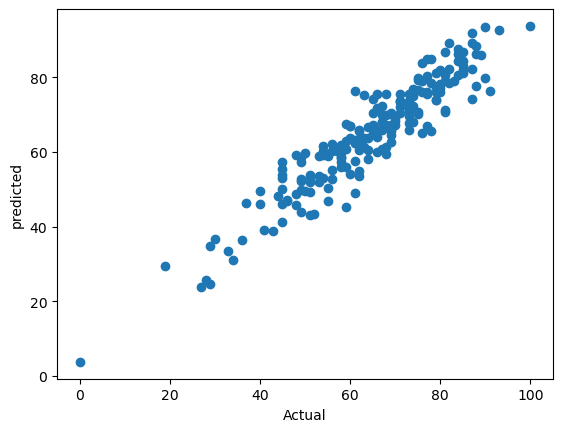

In [39]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('predicted')


<Axes: xlabel='math score'>

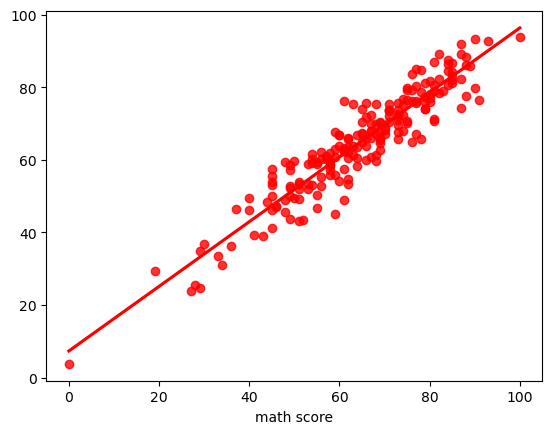

In [40]:
sns.regplot(x=y_test,y=y_pred,ci=None,color='red')

In [41]:
pred_df = pd.Dataframe({'Actual Value':y_test,'predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

AttributeError: module 'pandas' has no attribute 'Dataframe'